## **Naive Bayes**

Naive Bayes is a probabilistic machine learning model based on Bayes’ Theorem. It assumes that all features are conditionally independent given the class label (the "naive" assumption). Despite its simplicity, Naive Bayes often performs surprisingly well.

#### **Bayes' Theorem**
The model is built on Bayes' Theorem:
$$P(y|X) = \dfrac{P(X|y)\cdot P(y)}{P(X)}$$
where:
- $P(y|X)$: Posterior probability of class $y$ given features $X$.
- $P(X|y)$: Likelihood (probability of features given class)
- $P(y)$: Prior probability class $y$
- $P(X)$: Marginal probability of features

In this project we use 2 variants of Naive Bayes:
1. Gaussian Naive Bayes
    - Assumes features follow a **normal distribution**.
    - Suitable for continuous data
2. Bernoulli Naive Bayes
    - Assumes features are **binary** (0/1)

#### **Advantages**
- Simple and easy to implement
- Fast to train and predict, even on large datasets
- Works well with high-dimensional data
- Performs well with relative small training data

#### **Limitations**
- Strong independence assumption rarely holds in real-world data
- Poor performance if features are highly correlated
- Requires careful handling of zero probabilities (usually handled with **Laplace smoothing**)

### **Import necessary libraries**

In [1]:
import os 
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### **Prepare train, test data**

In [ ]:
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')

In [3]:
X_train = train_df.drop(columns=['diabetes'])
y_train = train_df['diabetes']
X_test = test_df.drop(columns=['diabetes'])
y_test = test_df['diabetes']

### **Initialize model**

#### **Gaussian Naive Bayes**

In [4]:
gaussian_model = GaussianNB()

In [5]:
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [6]:
gaussian_y_pred = gaussian_model.predict(X_test)

In [7]:
gaussian_y_pred

array([0, 0, 1, ..., 1, 1, 1])

Accuracy:  0.880964289286786
Recall:  0.7011764705882353
Precision:  0.38903394255874674
F1 Score:  0.5004198152812762


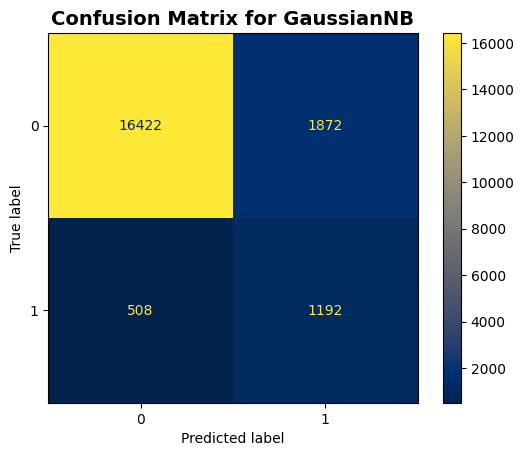

In [8]:
print("Accuracy: ", accuracy_score(y_test, gaussian_y_pred))
print("Recall: ", recall_score(y_test, gaussian_y_pred))
print("Precision: ", precision_score(y_test, gaussian_y_pred))
print("F1 Score: ", f1_score(y_test, gaussian_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, gaussian_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for GaussianNB", fontsize=14, weight='bold')
plt.show()

#### **Bernoulli Naive Bayes**

In [9]:
bernoulli_model = BernoulliNB()

In [10]:
bernoulli_model.fit(X_train, y_train)

BernoulliNB()

In [11]:
bernoulli_y_pred = bernoulli_model.predict(X_test)

In [12]:
bernoulli_y_pred

array([0, 0, 1, ..., 1, 0, 0])

Accuracy:  0.9044713414024207
Recall:  0.46588235294117647
Precision:  0.4414715719063545
F1 Score:  0.45334859759587864


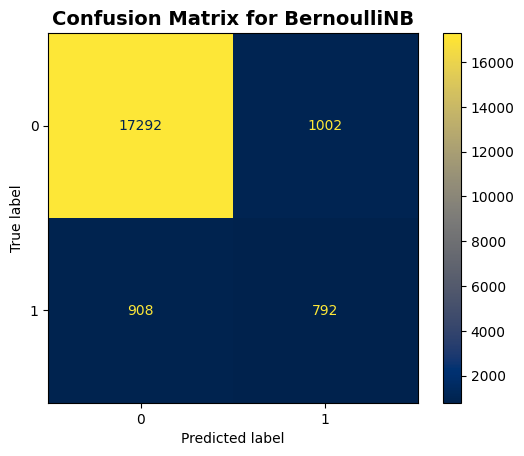

In [13]:
print("Accuracy: ", accuracy_score(y_test, bernoulli_y_pred))
print("Recall: ", recall_score(y_test, bernoulli_y_pred))
print("Precision: ", precision_score(y_test, bernoulli_y_pred))
print("F1 Score: ", f1_score(y_test, bernoulli_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, bernoulli_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for BernoulliNB", fontsize=14, weight='bold')
plt.show()

### **Fine-tune hyperparameters**

#### **Fine-tune Gaussian Naive Bayes**

In [14]:
finetuned_gaussian_model = GaussianNB()

In [ ]:
params_grid = {
    'var_smoothing': np.logspace(-12, 1, num=1000)
}

grid = GridSearchCV(finetuned_gaussian_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

In [16]:
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'var_smoothing': 0.20338003058469842}
Best CV score: 0.9549603756926197


In [17]:
best_gaussian_model = GaussianNB(
    **grid.best_params_
)

In [18]:
best_gaussian_model.fit(X_train, y_train)

GaussianNB(var_smoothing=0.20338003058469842)

In [19]:
best_gaussian_y_pred = best_gaussian_model.predict(X_test)

Accuracy:  0.9563369010703211
Recall:  0.5794117647058824
Precision:  0.8617672790901137
F1 Score:  0.6929300035174113


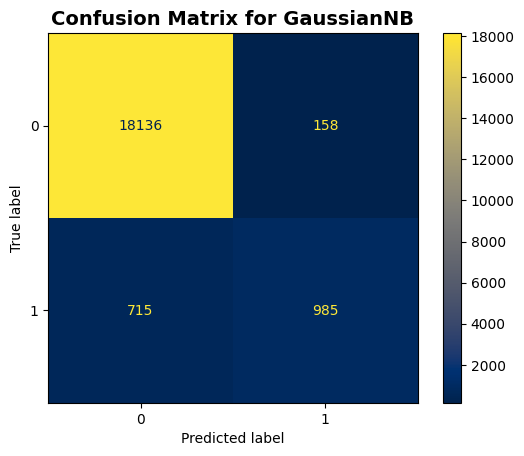

In [20]:
print("Accuracy: ", accuracy_score(y_test, best_gaussian_y_pred))
print("Recall: ", recall_score(y_test, best_gaussian_y_pred))
print("Precision: ", precision_score(y_test, best_gaussian_y_pred))
print("F1 Score: ", f1_score(y_test, best_gaussian_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_gaussian_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for GaussianNB", fontsize=14, weight='bold')
plt.show()

#### **Fine-tune Bernoulli Naive Bayes**

In [21]:
finetuned_bernoulli_model = BernoulliNB()

In [ ]:
params_grid = {
    'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10, 100, 1000],
    'force_alpha': [True, False],
    'binarize': [None, 0.4, 0.5, 0.6],
    'fit_prior': [True, False],
}

grid = GridSearchCV(finetuned_bernoulli_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

In [23]:
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'alpha': 100, 'binarize': 0.6, 'fit_prior': True, 'force_alpha': True}
Best CV score: 0.9251756568763302


In [24]:
best_bernoulli_model = BernoulliNB(
    **grid.best_params_
)

In [25]:
best_bernoulli_model.fit(X_train, y_train)

BernoulliNB(alpha=100, binarize=0.6, force_alpha=True)

In [26]:
best_bernoulli_y_pred = best_bernoulli_model.predict(X_test)

Accuracy:  0.9248274482344704
Recall:  0.41294117647058826
Precision:  0.5816072908036454
F1 Score:  0.48297213622291024


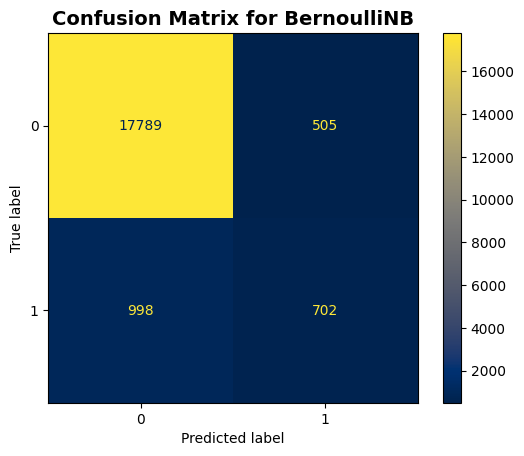

In [27]:
print("Accuracy: ", accuracy_score(y_test, best_bernoulli_y_pred))
print("Recall: ", recall_score(y_test, best_bernoulli_y_pred))
print("Precision: ", precision_score(y_test, best_bernoulli_y_pred))
print("F1 Score: ", f1_score(y_test, best_bernoulli_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_bernoulli_y_pred)).plot(cmap=plt.cm.cividis)

plt.title("Confusion Matrix for BernoulliNB", fontsize=14, weight='bold')
plt.show()